In [1]:
import pandas as pd

In [7]:
from flask import Flask, render_template, session, escape,request
from fbprophet import Prophet
from datetime import timedelta,datetime
import os
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
from my_util.gangert_weather import *

In [4]:
df = pd.read_csv("./static/data/seoulpark_result.csv")
del df['Unnamed: 0'] 
df

,지역,공원면적,면적,면적대비 공원면적 비율,공원수,인구수,인구 비율,인당 면적비
0,강남구,2851968.50,39500000.0,7.220173,5,544085,0.054665,5.241770
1,강동구,1526389.30,24590000.0,6.207358,7,462275,0.046446,3.301908
2,강북구,2047054.40,23600000.0,8.673959,3,313550,0.031503,6.528638
3,강서구,2194154.10,41440000.0,5.294773,9,589536,0.059232,3.721832
4,관악구,10431453.08,29570000.0,35.277149,2,514555,0.051698,20.272766
5,광진구,584002.00,17060000.0,3.423224,2,361923,0.036363,1.613608
6,구로구,1720657.00,20120000.0,8.551973,4,435751,0.043781,3.948716
7,금천구,57568.00,13020000.0,0.442151,4,249641,0.025082,0.230603
8,노원구,12235699.30,35440000.0,34.525111,3,529532,0.053203,23.106629
9,도봉구,1084218.00,20660000.0,5.247909,6,329300,0.033085,3.292493


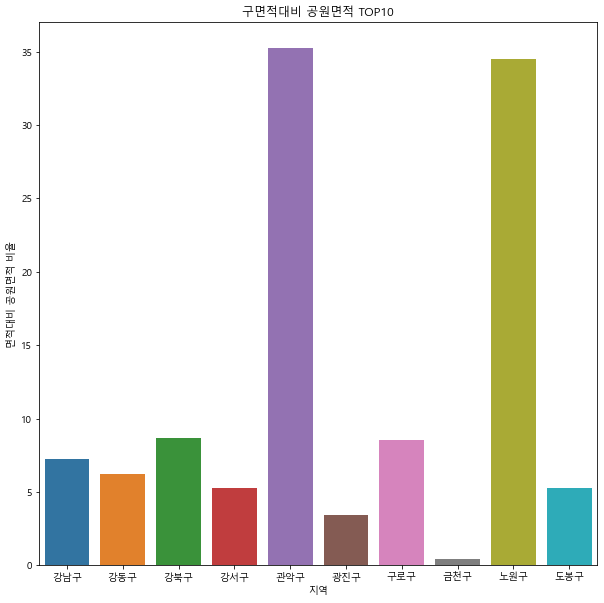

In [8]:
plt.figure(figsize=(10,10))
sns.barplot(data=df.head(10),y='면적대비 공원면적 비율',x='지역')
plt.title("구면적대비 공원면적 TOP10")
plt.show()